In [176]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [177]:
import numpy as np
import matplotlib.pyplot as plt

from neuron_population import NeuronPopulation
from connectome import Connectome
from overhead import Simulation

In [178]:
dt = 0.1

In [179]:
# Neuron population parameters
layer_distribution = [10, 10]
n_layers = 2
neuron_types = ["p23", "TRN", "b", "nb"]
n_neuron_types = len(neuron_types)
inhibitory = [False, False, True, True]
dist_layer1 = np.array([60, 20, 10, 10])
dist_layer2 = np.array([40, 40, 10, 10])
neuron_distribution = [dist_layer1, dist_layer2]
threshold_decay = np.exp(-dt / 1)
layer_distances = np.zeros((n_layers, n_layers))
# mm
layer_distances[0, 0] = 0.6
layer_distances[1, 1] = 0.6
layer_distances[0, 1] = 5.0
layer_distances[1, 0] = 5.0

In [180]:
neuron_pop = NeuronPopulation(
    layer_distribution,
    neuron_distribution,
    layer_distances,
    neuron_types,
    inhibitory,
    threshold_decay,
    threshold_mult=1.0
)

In [181]:
# Connectome
max_synapses = 5
synapse_strength = np.ones((n_layers, n_layers))
# neuron_types = ["p23", "TRN", "b", "nb"]
connectivity_probability = np.zeros((n_layers, n_layers, n_neuron_types, n_neuron_types))
connectivity_probability[0, 0, 0, 0] = 60
connectivity_probability[0, 0, 1, 0] = 1
connectivity_probability[0, 0, 2, 0] = 9
connectivity_probability[0, 0, 3, 0] = 5

connectivity_probability[0, 0, 0, 0] = 60
connectivity_probability[0, 0, 0, 1] = 1
connectivity_probability[0, 0, 0, 2] = 9
connectivity_probability[0, 0, 0, 3] = 5

connectivity_probability[1, 1, 0, 0] = 60
connectivity_probability[1, 1, 1, 0] = 1
connectivity_probability[1, 1, 2, 0] = 9
connectivity_probability[1, 1, 3, 0] = 5

connectivity_probability[1, 1, 0, 0] = 60
connectivity_probability[1, 1, 0, 1] = 1
connectivity_probability[1, 1, 0, 2] = 9
connectivity_probability[1, 1, 0, 3] = 5

In [182]:
neuron_pop.type_from_neuron_index(0)


np.str_('p23')

In [183]:
connectome = Connectome(
    max_synapses,
    neuron_pop,
    connectivity_probability,
    synapse_strength,
)

In [184]:
sim = Simulation(connectome, dt, stepper_type="adapt")

In [ ]:
I_ext = 35

for i in range(10000):
    sim.step(I_ext=I_ext)

In [186]:
neuron_pop.get_types_from_layer(0)
neuron_pop.get_neurons_from_layer(0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

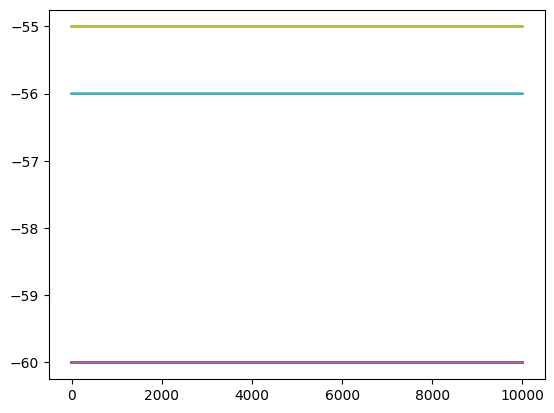

In [195]:
plt.plot(np.array(sim.stats.Vs)[:, neuron_pop.get_neurons_from_layer(0)])
plt.show()

## Cortical column

In [207]:
n_neurons = 200
max_synapses = 200
n_layers = 6

layer_percentages = [1.5, 26 + 3.1 + 4.2, 9.2 + 9.2 + 9.2 + 5.4 + 1.5, 4.8 + 1.3 + 0.6 + 0.8,
                     13.6 + 4.5 + 2 + 2, 0.5 + 0.5 + 0.1 + 0.1 + 0.5]

layer_dist = list(np.array(layer_percentages) / 100.0 * n_neurons)
# Convert elements to integers, rounding down
neurons_per_layer = [int(np.floor(x)) for x in layer_dist]

In [208]:
neuron_types = ["nb1", "p23", "b", "nb", "ss4", "p4", "p5_p6", "TC", "TI", "TRN"]
n_neuron_types = len(neuron_types)
inhibitory = [True, False, True, True, False, False, False, False, True, True]

In [209]:
dist_layers = np.zeros((n_layers, n_neuron_types))
dist_layers[0, 0] = 1.0

dist_layers[1, 1] = 26.0
dist_layers[1, 2] = 3.1
dist_layers[1, 3] = 4.2

dist_layers[2, 2] = 5.4
dist_layers[2, 3] = 1.5
dist_layers[2, 4] = 9.2 + 9.2
dist_layers[2, 5] = 9.2

dist_layers[3, 6] = 4.8 + 1.3
dist_layers[3, 2] = 0.6
dist_layers[3, 3] = 0.8

dist_layers[4, 6] = 4.5
dist_layers[4, 2] = 2
dist_layers[4, 3] = 2

dist_layers[5, 7] = 1
dist_layers[5, 8] = 0.2
dist_layers[5, 9] = 0.5

In [210]:
threshold_decay = np.exp(-dt / 1)

In [211]:
layer_distances = np.zeros((n_layers, n_layers))
# mm
# Fill diagonal with 0.6 mm (vectorized)
layer_distances[np.diag_indices(n_layers)] = 0.3
# Fill all other elements with the difference of the index times 0.6
for i in range(n_layers):
    for j in range(n_layers):
        if i != j:
            layer_distances[i, j] = abs(i - j) * 0.6

layer_distances

array([[0.3, 0.6, 1.2, 1.8, 2.4, 3. ],
       [0.6, 0.3, 0.6, 1.2, 1.8, 2.4],
       [1.2, 0.6, 0.3, 0.6, 1.2, 1.8],
       [1.8, 1.2, 0.6, 0.3, 0.6, 1.2],
       [2.4, 1.8, 1.2, 0.6, 0.3, 0.6],
       [3. , 2.4, 1.8, 1.2, 0.6, 0.3]])

In [212]:
synapse_strength = np.ones((n_layers, n_layers))

In [213]:
neuron_pop = NeuronPopulation(
    neurons_per_layer,
    dist_layers,
    layer_distances,
    neuron_types,
    inhibitory,
    threshold_decay,
    threshold_mult=1.0
)

In [214]:
C = np.load("connectivity_matrix.npy")

In [215]:
connectome = Connectome(
    max_synapses,
    neuron_pop,
    C,
    synapse_strength,
)

In [216]:
sim = Simulation(connectome, dt, stepper_type="adapt")

In [220]:
I_ext = 35

for i in range(1000):
    sim.step(I_ext=I_ext)

In [221]:
neuron_pop.get_types_from_layer(0)
neuron_pop.get_neurons_from_layer(0)

array([0, 1, 2])

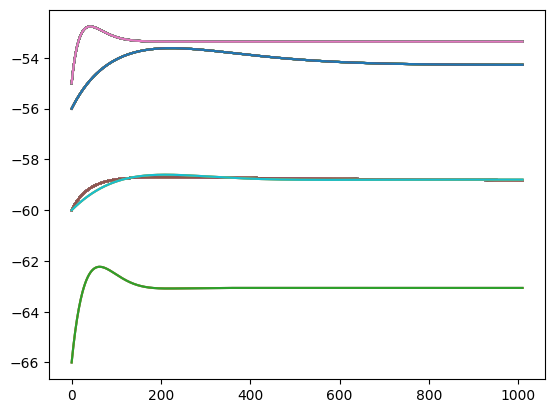

In [222]:
plt.plot(np.array(sim.stats.Vs))
plt.show()